In [1]:
# Sin tildes. |ya
# Sin caracteres especiales. |ya
# Sin correos, números, símbolos y otros diferentes a palabras. |ya
# Sin siglas (No más de una letra mayúscula en una misma palabra). |ya
# No caracteres: [\n, \t, \u200b] |ya
#Únicamente palabras en minúsculas. |ya
# No palabras repetidas. |ya 
# Longitud mayor a 3 caracteres |ya
#Sin stop words. Palabras como: el, la, los, son, ellos, ellas, etc. |ya


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import string
import re
from collections import OrderedDict 
import nltk
from nltk.corpus import stopwords
import string
from scipy.stats import chi2
import scipy.stats as stats
from scipy.stats import kstest, norm
import pylab
import statsmodels.api as sm


nltk.download('stopwords')
stop_words = stopwords.words('spanish')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
with open('/content/drive/MyDrive/2021/output_file.txt','r') as raw_file:
  text = raw_file.read()
#no accent
d  = {'Á':'a','É':'e','Í':'i','Ó':'o','Ú':'u','á':'a','é':'e','í':'i','ó':'o','ú':'u'}
text_no_acent = re.sub(r'([ÁÉÍÓÚáéíóú])', lambda m: str(d[m.group(1)]), text)
#just letters
text_different = re.sub("[^0-9a-zñA-ZÑ]+", " ", text_no_acent) 
text_no_numbers = re.sub("[0-9]+", "", text_different)
#qjust one upper case latter
one_upper = re.sub(r"\w*[A-Z]\w*[A-Z]\w*"," ",text_no_numbers )
#everything to lower case
new_string = re.sub(r"[A-Z]",lambda m: str(m.group(0).lower()),one_upper )
#creating list with words
list_words = re.findall(r'[a-zñ]+',new_string)
#creating pd with column words
df = pd.DataFrame(list_words,columns =['Words'])
df_words = df.groupby(['Words'])['Words'].count().reset_index(name="count")
#creating column Number of letters
df_words['Number of letters'] = df_words['Words'].str.len()
#just words with more than 3 letters
df_words = df_words[~(df_words['Number of letters'] < 4 )]
#droping stop_words
df_words = df_words[~df_words['Words'].isin(stop_words)]#corregir stopwords antes de quitar tilde
#creating column Number of vowels
df_words['Number of vowels'] = df_words['Words'].str.count(r'[aeiou]')
#creating column Number of consonants
number_of_consonant = df_words['Number of letters']-df_words['Number of vowels']
df_words['Number of consonants'] = number_of_consonant
df_words
#df_words.sort_values(by=['count'])


,Words,count,Number of letters,Number of vowels,Number of consonants
1,aachen,1,6,3,3
2,aaron,3,5,3,2
4,abad,1,4,2,2
5,abadan,1,6,3,3
6,abades,1,6,3,3
...,...,...,...,...,...
33131,zuñiga,2,6,3,3
33132,zygmunt,2,7,1,6
33133,zyklon,2,6,1,5
33134,ñame,1,4,2,2


In [4]:
data_f = df_words['Number of letters'].values
mean = statistics.mean(data_f)
median = statistics.median(data_f)
mode = statistics.mode(data_f)
q1,q3,p90= np.percentile(data_f, [25,75,90])
iqr = q3 - q1
threshold = q3+1.5*iqr
max_value_words = max(data_f)
min_value_words = min(data_f)
var_value = np.var(data_f)
std_value = np.std(data_f)
print("mean:", mean)
print("median:", median)
print("mode:", mode)
print("q1:", q1)
print("q3:", q3)
print("p90:", p90)
print("iqr:", iqr)
print("threshold atypical values",threshold)
print("max:", max_value_words)
print("min:", min_value_words)
print("range:", max_value_words-min_value_words)
print("var:", var_value)
print("std:",std_value)

mean: 8
median: 8.0
mode: 8
q1: 7.0
q3: 10.0
p90: 12.0
iqr: 3.0
threshold atypical values 14.5
max: 25
min: 4
range: 21
var: 6.781908500188599
std: 2.6042097650129103


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


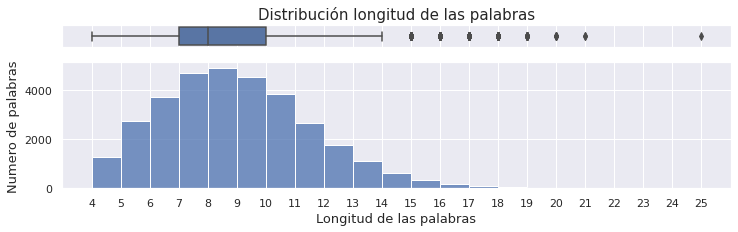

In [5]:
#distribución longitud de las palabras
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2,figsize=(12,3), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_words["Number of letters"], ax=ax_box)
sns.histplot(data=df_words, x="Number of letters",binwidth=1,bins=max_value_words, ax=ax_hist)
ax_hist.set_xticks(range(min_value_words,max_value_words+1))
ax_box.set(xlabel='')
ax_box.set_title("Distribución longitud de las palabras",fontsize=15)
plt.ylabel('Numero de palabras', fontsize=13)
plt.xlabel('Longitud de las palabras', fontsize=13)
plt.show()

In [6]:
df_correlation = df_words[['count','Number of letters','Number of vowels','Number of consonants']]
df_correlation.columns = ['Ocurrencias','Longitud','Cantidad de vocales','Cantidad de consonates']
df_correlation

,Ocurrencias,Longitud,Cantidad de vocales,Cantidad de consonates
1,1,6,3,3
2,3,5,3,2
4,1,4,2,2
5,1,6,3,3
6,1,6,3,3
...,...,...,...,...
33131,2,6,3,3
33132,2,7,1,6
33133,2,6,1,5
33134,1,4,2,2


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


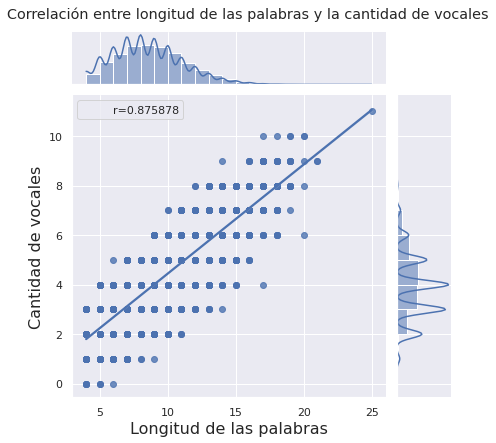

In [7]:
from scipy import stats
graph = sns.jointplot(x = df_correlation["Longitud"].values, y = df_correlation["Cantidad de vocales"].values, kind="reg",marginal_kws=dict(binwidth=1, rug=True))

r, p = stats.spearmanr(df_correlation["Longitud"].values, df_correlation["Cantidad de vocales"].values)
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}'.format(r,p)])
graph.set_axis_labels('Longitud de las palabras', 'Cantidad de vocales', fontsize=16)
graph.fig.suptitle("Correlación entre longitud de las palabras y la cantidad de vocales")
graph.fig.subplots_adjust(top=0.92) 
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


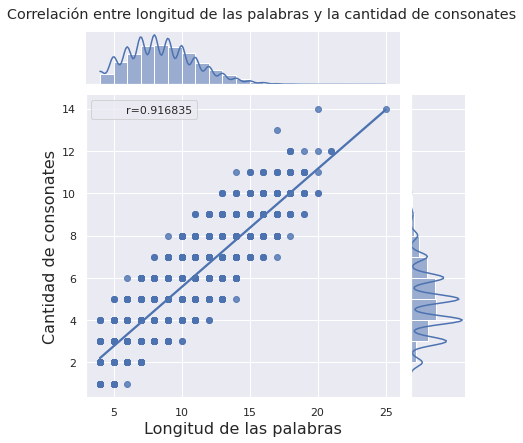

In [8]:
from scipy import stats
graph = sns.jointplot(x = df_correlation["Longitud"].values, y = df_correlation["Cantidad de consonates"].values, kind="reg",marginal_kws=dict(binwidth=1, rug=True))

r, p = stats.spearmanr(df_correlation["Longitud"].values, df_correlation["Cantidad de consonates"].values)
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}'.format(r,p)])
graph.set_axis_labels('Longitud de las palabras', 'Cantidad de consonates', fontsize=16)
graph.fig.suptitle("Correlación entre longitud de las palabras y la cantidad de consonates")
graph.fig.subplots_adjust(top=0.92) 
plt.show()

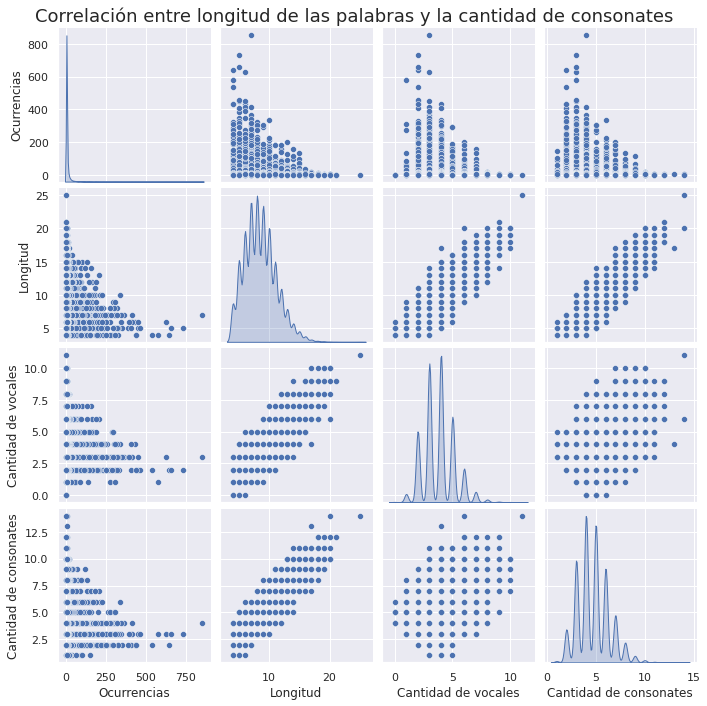

In [9]:
graph = sns.pairplot(df_correlation, diag_kind='kde')
graph.fig.suptitle("Correlación entre longitud de las palabras y la cantidad de consonates", fontsize=18)
graph.fig.subplots_adjust(top=0.95) 
plt.show()

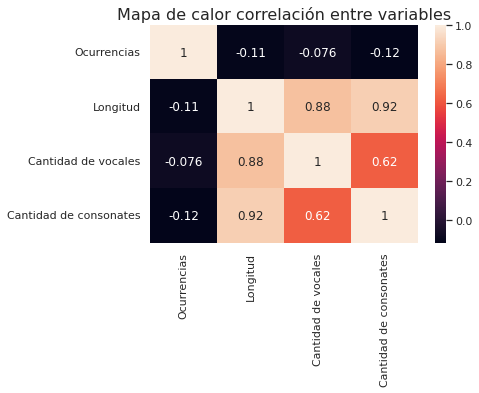

In [10]:
sns.heatmap(df_correlation.corr(method='spearman'), annot= True)
plt.title('Mapa de calor correlación entre variables', fontsize=16)
plt.show()

In [11]:
alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)
alphabet_list.append('ñ')
#max_df = np.max(list(df_words['Number of letters'].values))
columns = ['Letters',"Mean","Median","Mode","First quartile","Third quartile","90% percentile",
           "Interquartile range","Max","Min","Range","Variance","Standard deviation","threshold"]
number_columns = [*range(1, 26)]
columns.extend(number_columns)
df_letters = pd.DataFrame(columns = columns)
dict_letters_position = {}
for letter in alphabet_list:
  position_list = []
  for word in df_words['Words']:
    if letter in word:
      l = [pos+1 for pos, char in enumerate(word) if char == letter]
      position_list.extend(l)
  dict_letters_position[letter]=position_list
  
  mean = statistics.mean(position_list)
  median = statistics.median(position_list)
  mode = statistics.mode(position_list)
  q1,q3,p90= np.percentile(position_list, [25,75,90])
  iqr = q3 - q1
  threshold = q3+(1.5*iqr)
  max_value = max(position_list)
  min_value = max(position_list)
  range_value = max_value-min_value
  var_value = np.var(position_list)
  std_value = np.std(position_list)
  dicts = {'Letters':letter,"Mean":mean,"Median":median,"Mode":mode,"First quartile":q1,
           "Third quartile":q3,"90% percentile":p90,"Interquartile range":iqr,"Max":max_value,
           "Min":min_value,"Range":range_value,"Variance":var_value,"Standard deviation":std_value,"threshold":threshold}
  for i in range(1,max_value_words+1):
    count = position_list.count(i)
    dicts[i] = count
  
  df_letters = df_letters.append(dicts, ignore_index=True)
#df_letters.head()

In [12]:
df_count_letters = df_letters.loc[:,1:]
df_count_letters.index = df_letters['Letters']
df_count_letters.loc["Total"] = df_count_letters.sum()
df_count_letters['Total'] = df_count_letters.sum(axis=1)
df_count_letters

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,Total
Letters,,,,,,,,,,,,,,,,,,,,,
a,3396,4547,2056,3590,3955,4050,4398,3400,2547,1722,...,12,5,2,2,0,0,1,0,0,35862.0
b,1093,349,1008,468,450,383,329,245,157,94,...,1,0,0,0,0,0,0,0,0,4648.0
c,3852,537,2061,1588,1449,1496,1124,1059,678,408,...,2,0,0,0,0,0,0,0,0,14735.0
d,2223,379,1020,1037,994,1354,1259,1258,902,620,...,5,3,1,1,1,0,0,0,0,11743.0
e,2530,5994,2150,3843,3368,2265,1941,1506,1149,907,...,18,11,9,0,0,0,0,0,0,27468.0
f,1123,172,539,389,259,255,134,115,34,18,...,1,0,0,0,0,0,0,0,0,3072.0
g,878,217,895,714,553,500,270,199,88,50,...,0,0,0,0,0,0,0,0,0,4414.0
h,887,328,197,336,273,144,112,76,40,20,...,0,0,0,0,0,0,0,0,0,2437.0
i,1691,3082,1731,3687,3624,3422,3098,2012,1679,956,...,7,3,0,0,1,0,0,0,0,26036.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


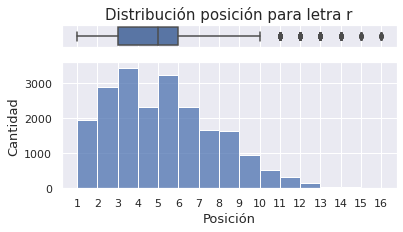

In [13]:
#plot the distribution of the position for a letter
letter = "r"
title = "Distribución posición para letra {}".format(letter)
position_list = dict_letters_position[letter]

sns.set(style="darkgrid")

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,figsize=(6,3), gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax
sns.boxplot(position_list, ax=ax_box)

sns.histplot(position_list,binwidth=1,bins=max(position_list), ax=ax_hist)
ax_hist.set_xticks(range(min(position_list),max(position_list)+1))
ax_box.set(xlabel='')
ax_box.set_title(title,fontsize=15)
plt.ylabel('Cantidad', fontsize=13)
plt.xlabel('Posición', fontsize=13)
plt.show()

In [14]:
#creating_list_position
list_vowel_position = []
list_consonant_position = []
for x in dict_letters_position:
  if x in ["a","e","i","o","u"]:
    list_vowel_position.extend(dict_letters_position[x])
  else:
    list_consonant_position.extend(dict_letters_position[x])

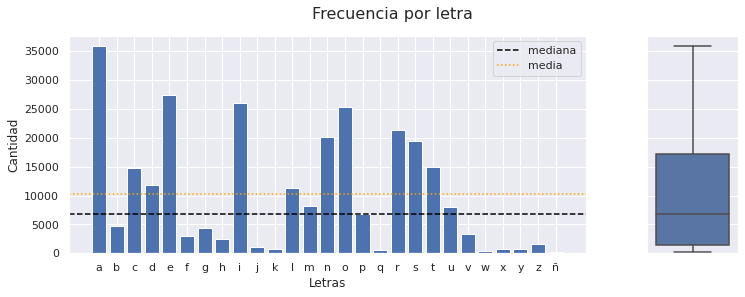

In [15]:
#distribution of the frecuency for the letters
df_count_letters['Total']
sns.set(style="darkgrid")
median = statistics.median(df_count_letters["Total"].iloc[:-1].values)
mean = statistics.mean(df_count_letters["Total"].iloc[:-1].values)
f, (ax_bar, ax_box) = plt.subplots(ncols=2,sharey=True,figsize=(12,4), gridspec_kw={"width_ratios": (.85, .15)})
sns.boxplot(y = df_count_letters["Total"].iloc[:-1], ax=ax_box)
ax_bar.bar(df_count_letters["Total"].iloc[:-1].index,df_count_letters["Total"].iloc[:-1].values)
ax_bar.axhline(y = median, color = 'black', linestyle = '--',label = 'mediana')
ax_bar.axhline(y = mean, color = 'orange', linestyle = ':',label = 'media')
ax_box.set(ylabel='')
ax_bar.set(ylabel='Cantidad')
ax_bar.set(xlabel='Letras')
f.suptitle('Frecuencia por letra', fontsize=16)
ax_box.set_xticks([])
ax_bar.legend()
plt.show()

In [16]:
my_data = norm.rvs(size=100000)
ks_statistic, p_value = kstest(my_data, 'norm')
print('Normal',ks_statistic, p_value)
ks_statistic, p_value = kstest(list_vowel_position, 'norm')
print('Vowels',ks_statistic, p_value)
ks_statistic, p_value = kstest(list_consonant_position, 'norm')
print('Consonants',ks_statistic, p_value)


Normal 0.002175720565375072 0.7310698303543615
Vowels 0.9070267979021289 0.0
Consonants 0.8413447460685429 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


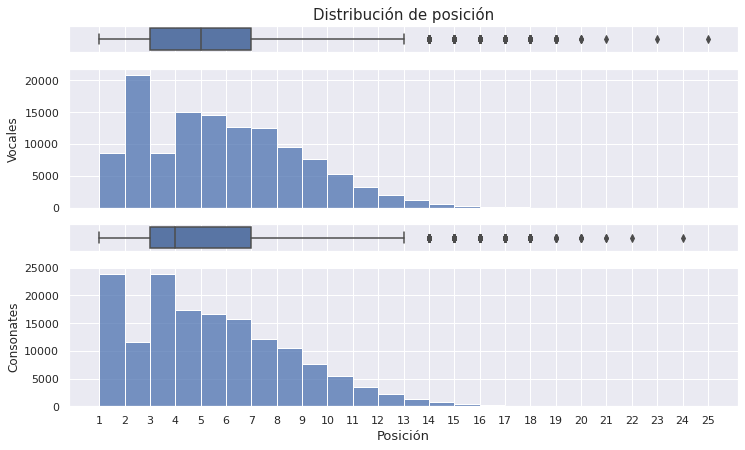

In [17]:
#distribution vowel
sns.set(style="darkgrid")
max_value_vowel=max(list_vowel_position)
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist, ax_boxc, ax_histc) = plt.subplots(4,figsize=(12,7), sharex=True, gridspec_kw={"height_ratios": (.08, .42,.08, .42)})
# assigning a graph to each ax
sns.boxplot(list_vowel_position, ax=ax_box)
sns.histplot(list_vowel_position,binwidth=1,bins=max_value_vowel, ax=ax_hist)

sns.boxplot(list_consonant_position, ax=ax_boxc)
sns.histplot(list_consonant_position,binwidth=1,bins=max_value_vowel, ax=ax_histc)

ax_hist.set_xticks(range(1,max_value_vowel+1))
ax_box.set(xlabel='')
ax_box.set_title("Distribución de posición",fontsize=15)
# plt.ylabel('Frecuencia', fontsize=13)
ax_hist.set(ylabel='Vocales')
ax_histc.set(ylabel='Consonates')
plt.xlabel('Posición', fontsize=13)
plt.show()

In [18]:
list_consonant_position_atypical = list_consonant_position
list_vowel_position_atypical = list_vowel_position
list_vowel_position = [number for number in list_vowel_position if number < 14]
list_consonant_position  = [number for number in list_consonant_position if number < 14]

In [19]:
ks_statistic, p_value = kstest(my_data, 'norm')
print('Normal',ks_statistic, p_value)
ks_statistic, p_value = kstest(list_vowel_position, 'norm')
print('Vowels',ks_statistic, p_value)
ks_statistic, p_value = kstest(list_consonant_position, 'norm')
print('Consonants',ks_statistic, p_value)

Normal 0.002175720565375072 0.7310698303543615
Vowels 0.9063819770565601 0.0
Consonants 0.8413447460685429 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


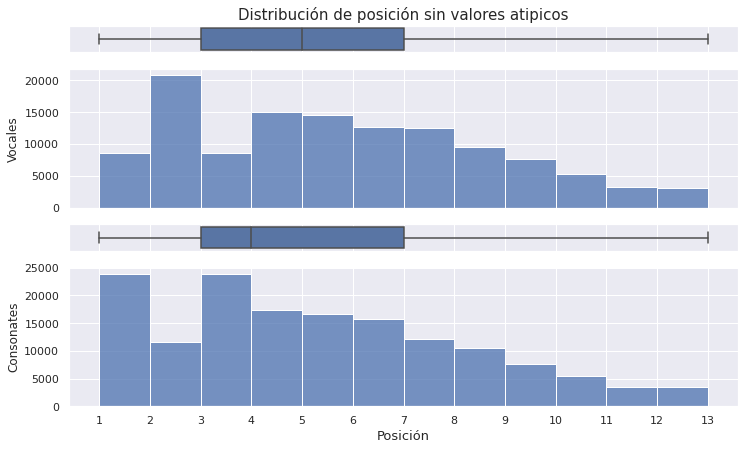

In [20]:
#distribution vowel
sns.set(style="darkgrid")
max_value_vowel=max(list_vowel_position)
f, (ax_box, ax_hist, ax_boxc, ax_histc) = plt.subplots(4,figsize=(12,7), sharex=True, gridspec_kw={"height_ratios": (.08, .42,.08, .42)})

sns.boxplot(list_vowel_position, ax=ax_box)
sns.histplot(list_vowel_position,binwidth=1,bins=max_value_vowel, ax=ax_hist)

sns.boxplot(list_consonant_position, ax=ax_boxc)
sns.histplot(list_consonant_position,binwidth=1,bins=max_value_vowel, ax=ax_histc)

ax_hist.set_xticks(range(1,max_value_vowel+1))
ax_box.set(xlabel='')
ax_box.set_title("Distribución de posición sin valores atipicos",fontsize=15)
ax_hist.set(ylabel='Vocales')
ax_histc.set(ylabel='Consonates')
plt.xlabel('Posición', fontsize=13)
plt.show()

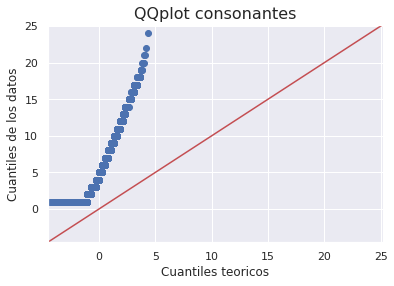

In [21]:

#plt.figure(figsize=(20,5))
sm.qqplot(np.array(list_consonant_position_atypical), line='45')
plt.ylabel('Cuantiles de los datos')
plt.xlabel('Cuantiles teoricos')
plt.title('QQplot consonantes', fontsize=16)

plt.show()

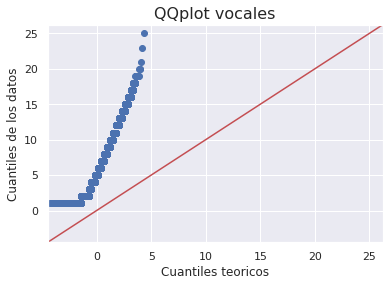

In [22]:
#plt.figure(figsize=(20,5))
sm.qqplot(np.array(list_vowel_position_atypical), line='45')
plt.ylabel('Cuantiles de los datos')
plt.xlabel('Cuantiles teoricos')
plt.title('QQplot vocales', fontsize=16)

plt.show()

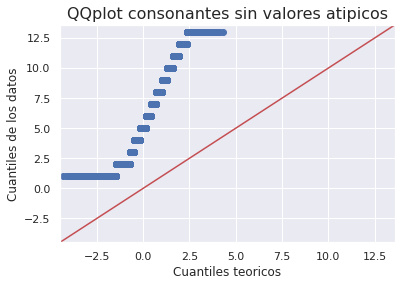

In [23]:
#plt.figure(figsize=(20,5))
sm.qqplot(np.array(list_vowel_position), line='45')
plt.ylabel('Cuantiles de los datos')
plt.xlabel('Cuantiles teoricos')
plt.title('QQplot consonantes sin valores atipicos', fontsize=16)

plt.show()

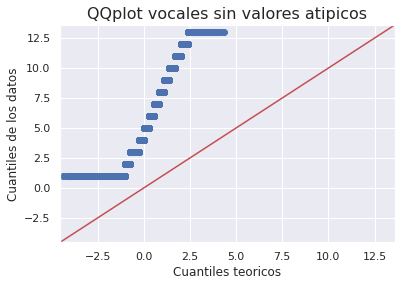

In [24]:
#plt.figure(figsize=(20,5))
sm.qqplot(np.array(list_consonant_position), line='45')
plt.ylabel('Cuantiles de los datos')
plt.xlabel('Cuantiles teoricos')
plt.title('QQplot vocales sin valores atipicos', fontsize=16)

plt.show()

In [25]:
df_letters['Category'] = np.where(df_letters['Letters'].isin(['a','e','i','o','u']), 'Vowel', 'Consonant')
cols = [x for x in range(1,26)]
df_category = df_letters.groupby(['Category'])[cols].sum()
df_category.columns = list(map(int, df_category.columns))
df_category

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
Category,,,,,,,,,,,,,,,,,,,,,
Consonant,23817,11651,23883,17373,16582,15797,12140,10508,7550,5416,...,157,84,33,7,5,2,1,0,1,0
Vowel,8613,20779,8547,15057,14564,12623,12593,9539,7624,5223,...,162,51,26,17,3,1,0,1,0,1


In [26]:
#without atypical values
df_category.drop(columns=df_category.columns[13:], axis=1, inplace=True)
df_category

,1,2,3,4,5,6,7,8,9,10,11,12,13
Category,,,,,,,,,,,,,
Consonant,23817,11651,23883,17373,16582,15797,12140,10508,7550,5416,3554,2185,1236
Vowel,8613,20779,8547,15057,14564,12623,12593,9539,7624,5223,3264,1965,1145


In [27]:
ch2, p, dof, freq = stats.chi2_contingency(df_category)
print(ch2)
p

14535.442484437363


0.0

In [28]:

df_category.loc["Total"] = df_category.sum()
df_category['Total'] = df_category.sum(axis=1)
df_category


,1,2,3,4,5,6,7,8,9,10,11,12,13,Total
Category,,,,,,,,,,,,,,
Consonant,23817,11651,23883,17373,16582,15797,12140,10508,7550,5416,3554,2185,1236,151692
Vowel,8613,20779,8547,15057,14564,12623,12593,9539,7624,5223,3264,1965,1145,121536
Total,32430,32430,32430,32430,31146,28420,24733,20047,15174,10639,6818,4150,2381,273228


In [29]:
consonant_list_chi =list(df_category.loc['Consonant'].values)
vowel_list_chi = list(df_category.loc['Vowel'].values)
total_list_chi = list(df_category.loc['Total'].values)
expected_consonant_list= []
expected_vowel_list= []
chi_consonant_list= []
chi_vowel_list= []
x2 = 0
len_list = len(vowel_list_chi)
for i in range(len_list-1):
  consonant_expected_value = (total_list_chi[i]*consonant_list_chi[-1])/total_list_chi[-1]
  expected_consonant_list.append(consonant_expected_value)

  vowel_expected_value = (total_list_chi[i]*vowel_list_chi[-1])/total_list_chi[-1]
  expected_vowel_list.append(vowel_expected_value)
  x2_consonant_value = ((consonant_list_chi[i]-consonant_expected_value)**2)/consonant_expected_value
  chi_consonant_list.append(x2_consonant_value)
  x2 += x2_consonant_value
  x2_value_vowel = ((vowel_list_chi[i]-vowel_expected_value)**2)/vowel_expected_value
  chi_vowel_list.append(x2_value_vowel)
  x2 += x2_value_vowel
print(x2)
expected_consonant_list.append(sum(expected_consonant_list[:-1]))
expected_vowel_list.append(sum(expected_vowel_list[:-1]))
chi_consonant_list.append(sum(chi_consonant_list[:-1]))
chi_vowel_list.append(sum(chi_vowel_list[:-1]))
print(x2)
1-chi2.cdf(x=x2,df=len_list-1)

14535.442484437363
14535.442484437363


0.0

In [30]:
df_category.loc["Expected consonant"] = expected_consonant_list
df_category.loc["Expected vowel"] = expected_vowel_list
df_category.loc["Chi consonant"] = chi_consonant_list
df_category.loc["Chi vowel"] = chi_vowel_list
df_category

,1,2,3,4,5,6,7,8,9,10,11,12,13,Total
Category,,,,,,,,,,,,,,
Consonant,23817.000000,11651.000000,23883.000000,17373.000000,16582.000000,15797.000000,12140.000000,10508.000000,7550.000000,5416.000000,3554.000000,2185.000000,1236.000000,151692.000000
Vowel,8613.000000,20779.000000,8547.000000,15057.000000,14564.000000,12623.000000,12593.000000,9539.000000,7624.000000,5223.000000,3264.000000,1965.000000,1145.000000,121536.000000
Total,32430.000000,32430.000000,32430.000000,32430.000000,31146.000000,28420.000000,24733.000000,20047.000000,15174.000000,10639.000000,6818.000000,4150.000000,2381.000000,273228.000000
Expected consonant,18004.639202,18004.639202,18004.639202,18004.639202,17291.782072,15778.348632,13731.382713,11129.787299,8424.372348,5906.609820,3785.249155,2304.016426,1321.894725,150370.105275
Expected vowel,14425.360798,14425.360798,14425.360798,14425.360798,13854.217928,12641.651368,11001.617287,8917.212701,6749.627652,4732.390180,3032.750845,1845.983574,1059.105275,120476.894725
Chi consonant,1876.379619,2242.129412,1919.234553,22.159182,29.134683,0.022048,184.431458,34.737361,90.751806,40.750617,14.127517,6.147920,5.581310,6460.006177
Chi vowel,2341.954459,2798.455559,2395.442731,27.657408,36.363698,0.027518,230.193332,43.356535,113.269508,50.861824,17.632893,7.673367,6.966167,8062.888831


In [31]:
expected_vowel_list.append(sum(expected_vowel_list[:-1]))
chi_vowel_list.append(sum(chi_vowel_list[:-1]))

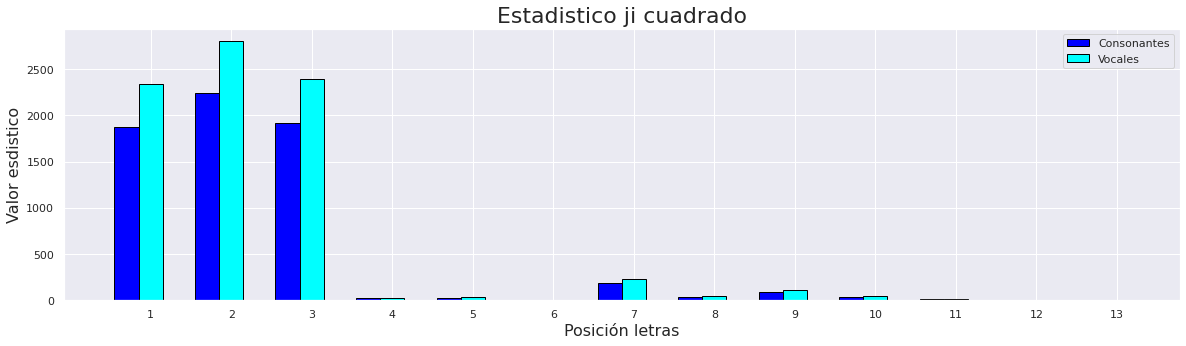

In [32]:
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = df_category.loc['Chi consonant'].values[:-1]
 
# Choose the height of the cyan bars
bars2 = df_category.loc['Chi vowel'].values[:-1]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.figure(figsize=(20,5))
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Consonantes')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='Vocales')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))],df_category.columns[:-1])
plt.ylabel('Valor esdistico', fontsize=16)
plt.xlabel('Posición letras', fontsize=16)
plt.title('Estadistico ji cuadrado', fontsize=22)
plt.legend()
 
# Show graphic
plt.show()
 

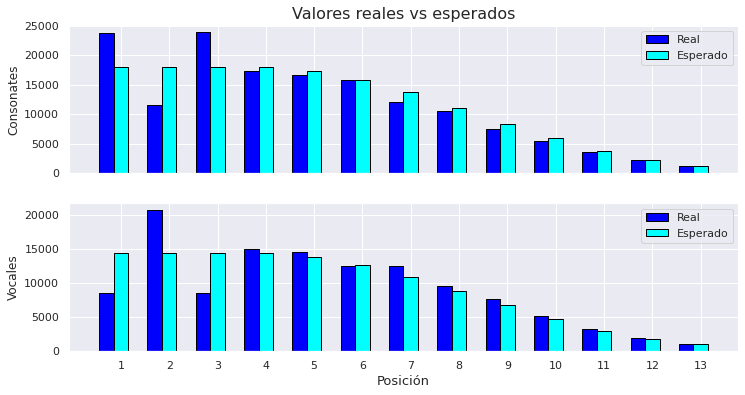

In [33]:
# width of the bars
barWidth = 0.3
sns.set(style="darkgrid")
f, (ax_con, ax_vow) = plt.subplots(2,figsize=(12,6), sharex=True)
bars1 = df_category.loc['Consonant'].values[:-1]
 
# Choose the height of the cyan bars
bars2 = df_category.loc['Expected consonant'].values[:-1]
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

ax_con.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Real')
ax_con.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='Esperado')
 
ax_vow.bar(r1, df_category.loc['Vowel'].values[:-1], width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Real')
ax_vow.bar(r2, df_category.loc['Expected vowel'].values[:-1], width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='Esperado')

ax_con.set_title('Valores reales vs esperados', fontsize=16)

ax_vow.set(ylabel='Vocales')
ax_con.set(ylabel='Consonates')

plt.xlabel('Posición', fontsize=13)
plt.xticks([r + barWidth for r in range(len(bars1))],df_category.columns[:-1])

ax_con.legend()
ax_vow.legend()
 
plt.show()